# **Bharath Intern - Machine Learning Internship**

## **Iris Flowers Classification**

Iris Flower Dataset - https://raw.githubusercontent.com/s-yogeshwaran/Bharat-intern-ml/main/Iris.csv

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("https://raw.githubusercontent.com/s-yogeshwaran/Bharat-intern-ml/main/Iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
print(f"no. of rows = {df.shape[0]}")
print(f"no. of columns = {df.shape[1]}")

no. of rows = 150
no. of columns = 5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

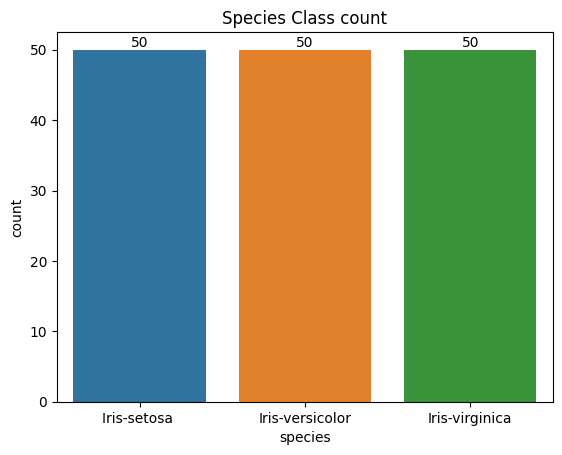

In [5]:
splot = sns.countplot(x = 'species', data = df)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.0f'),
   (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center', xytext = (0, 5),
    textcoords = 'offset points')
plt.title('Species Class count')
plt.xticks(range(3) , labels=['Iris-setosa ', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

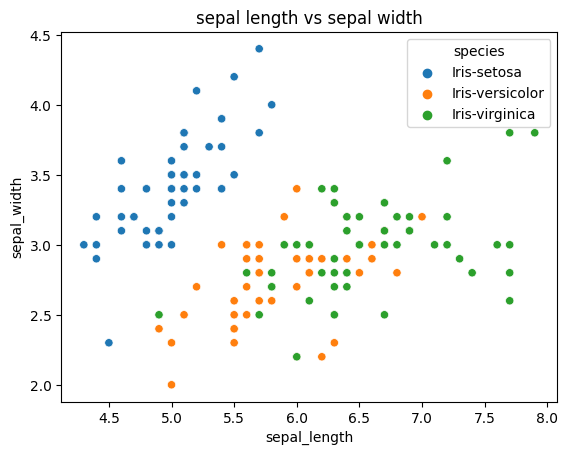

In [6]:
sns.scatterplot(x = "sepal_length", y = "sepal_width", hue = "species", data = df)
plt.title("sepal length vs sepal width")
plt.show()

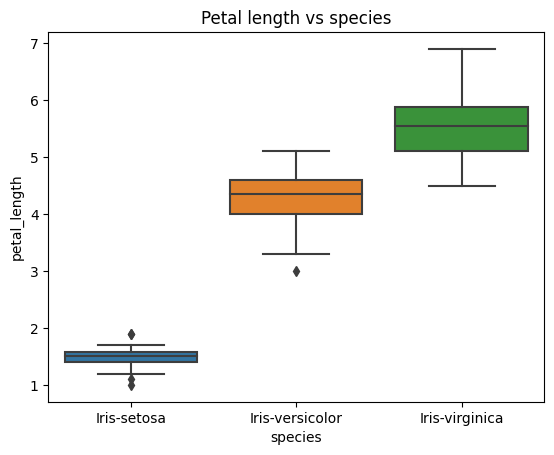

In [7]:
sns.boxplot(x = "species", y = "petal_length", data = df)
plt.title("Petal length vs species")
plt.show()

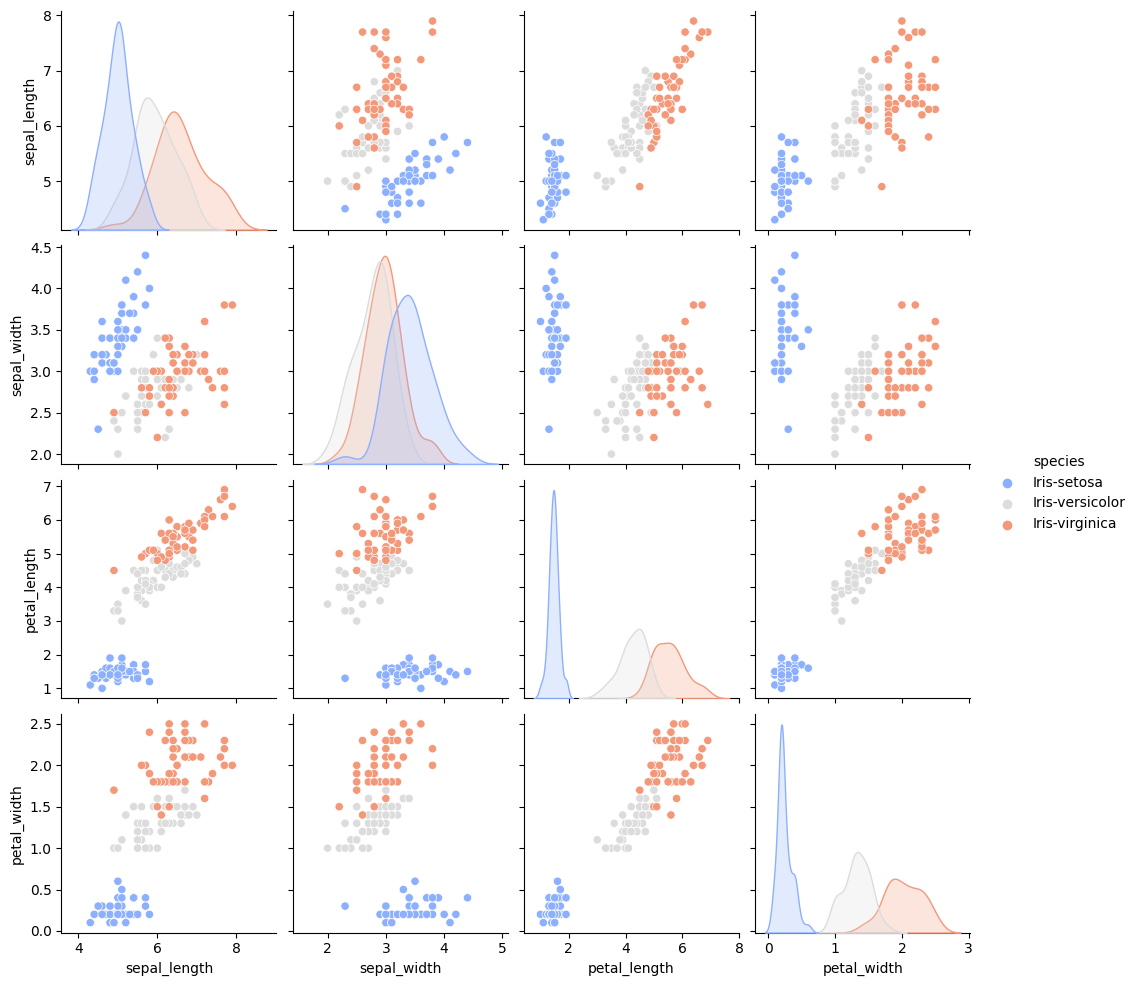

In [8]:
sns.pairplot(df, hue = 'species', palette = 'coolwarm')
plt.show()

In [9]:
x = df.iloc[:,:4].values # feature variable
y = df.iloc[:,4].values # target variable

In [10]:
# Spliting the data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [11]:
print(f"shape of x train = {x_train.shape}")
print(f"shape of y train = {y_train.shape}")
print(f"shape of x test = {x_test.shape}")
print(f"shape of y test = {y_test.shape}")

shape of x train = (112, 4)
shape of y train = (112,)
shape of x test = (38, 4)
shape of y test = (38,)


In [12]:
# Creating the model
model = LogisticRegression()
model.fit(x_train, y_train) #fitting the model with the train set

LogisticRegression()

In [13]:
# Prediction on test set using predict() function
y_pred = model.predict(x_test)
print(f"Predicted values for test set :\n\n{y_pred}")

Predicted values for test set :

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


In [14]:
print(f"Labels indentified for Test set :\n\n{pd.Series(model.predict(x_test)).value_counts()}")

Labels indentified for Test set :

Iris-setosa        15
Iris-virginica     12
Iris-versicolor    11
dtype: int64


In [15]:
print(f"Accuracy score = {accuracy_score(y_pred, y_test)*100}%")

Accuracy score = 100.0%


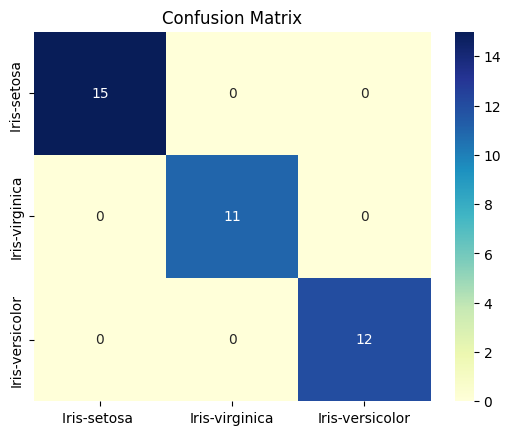

In [16]:
# Confusion_matrix using heatmap
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data = cm, index = ['Iris-setosa ', 'Iris-virginica', 'Iris-versicolor'], columns = ['Iris-setosa ', 'Iris-virginica', 'Iris-versicolor'])

sns.heatmap(data = cm_df, annot = True, cmap = 'YlGnBu') # cmap = 'YlGnBu' sets the colour gradient of the heatmap to yellow, green and blue.
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Classification report
print(f"{' '*20}Classification Report \n{' '*10+'-'*42}\n{classification_report(y_test, y_pred)}")

                    Classification Report 
          ------------------------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [18]:
#prediction
model.predict([[3.5, 5.1, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)



---

